# CSAT: E-Commerce Customer Satisfaction Score Prediction - Deep Learning (ANNs)
<h3 align="center">(by Aiman Sahay)</h3>

---

### Project Type - Deep Learning (ANNs) - EDA/Regression/Deep Learning/ANN

### Contribution - Individual - Aiman Sahay

---

## **PROJECT SUMMARY**

To be updated

---

## **GITHUB LINK**

Put the link here

---
## **PROJECT OBJECTIVE / PROBLEM STATEMENT**

The goal of this project is to **develop a Deep Learning–based Artificial Neural Network (ANN) model** that can **predict Customer Satisfaction (CSAT) scores** based on customer interaction data from the e-commerce platform Shopzilla.

Instead of relying solely on delayed survey responses, the intent is to estimate CSAT in real-time using features such as interaction details, timestamps, customer remarks, product categories, and agent-related attributes.

The model aims to forecast CSAT scores accurately and support organisations in:
- Identifying dissatisfied customers early,
- Improving service workflows, and
- Enhancing customer experience and retention.

This project therefore focuses on ***transforming CSAT measurement from a reactive process to a predictive mechanism*** by leveraging deep learning.

---
# ***Let's Begin !***

## **1. Know Your Data**

### Import Libraries

In [27]:
# Install Libararies
# !pip install missingno

# Install required packages
# !pip install tensorflow==2.17.1 keras-tuner==1.4.7 scikeras statsmodels imbalanced-learn
!pip install tensorflow keras keras-tuner scikeras statsmodels imbalanced-learn

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/332.0 MB 7.5 MB/s eta 0:00:44
   ---------------------------------------- 3.4/332.0 MB 8.3 MB/s eta 0:00:40
    --------------------------------------- 5.5/332.0 MB 9.0 MB/s eta 0:00:37
    --------------------------------------- 7.6/332.0 MB 9.4 MB/s eta 0:00:35
   - -------------------------------------- 10.5/332.0 MB 10.2 MB/s eta 0:00:32
   - -------------------------------------- 12.8/332.0 MB 10.5 MB/s eta 0:00:31
   - -------------------------------------- 15.5/332.0 MB 10.8 MB/s eta 0:00:30
   -- ------------------------------------- 18.1/332.0 MB 10.9 MB/s eta 0:00:29
   -- ------------------------------------- 21.0/332.0 MB 11.2 MB/s eta 0:00:28
   -- ------------------------------------- 23.3/332.0 MB 11.4 MB/s eta 0:00:28
   --- ------------------------------------ 26.2/332.0 MB 11.5 MB/s eta 0:00:27
   --- ------------------------------------ 28.8/332.0 MB

In [28]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, label_binarize
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasClassifier

### Load Dataset

In [3]:
df = pd.read_csv("C:/Users/aimee/OneDrive/Data Science MSc/AlmaBetter MSc Data Science/Capstone Projects/Spl_Mod_4_Intro_to_DL/eCommerce_Customer_support_data.csv")

### Dataset First View

In [4]:
df.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [6]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (85907, 20)


### Dataset Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

### Dataset Description

In [8]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


Since only 3 columns have a numerical data type, we get the statistical metrics only for these 3 columns at present. We'll analyze this further after data type conversion for other columns at a later stage.

### Duplicate Values

In [9]:
print(f" Duplicate values in the Dataset: {df.duplicated().sum()}")

 Duplicate values in the Dataset: 0


***There are no duplicate values in the dataset.***

### Missing Values

In [10]:
df.isnull().sum()

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

***Missing Values Percentage***

In [13]:
# Function to calculate missing values percentage.
def missing_val_df(df):
    # Calculate the total number of missing values in each column
    missing_count = df.isnull().sum()
    
    # Calculate the percentage of missing values in each column
    missing_percent = (missing_count / len(df)) * 100
    
    # Create a DataFrame to display missing counts and percentages side by side
    missing_df = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percent.round(2)
    })
    
    # Return the missing_values df
    return missing_df

In [12]:
missing_val_df(df)

,Missing Count,Missing Percentage
Unique id,0,0.00
channel_name,0,0.00
category,0,0.00
Sub-category,0,0.00
Customer Remarks,57165,66.54
Order_id,18232,21.22
order_date_time,68693,79.96
Issue_reported at,0,0.00
issue_responded,0,0.00
Survey_response_Date,0,0.00


***Visualize Missing Values***

In [22]:
# Function to plot missing vs. valid values
def plot_missing_valid(df, title, ax):
    total_counts = len(df)
    missing_counts = df.isnull().sum()
    valid_counts = total_counts - missing_counts

    ax.bar(missing_counts.index, valid_counts, label='Valid', color='lightblue')
    ax.bar(missing_counts.index, missing_counts, bottom=valid_counts, label='Missing', color='pink')

    ax.set_title(title)
    ax.set_xlabel('Columns')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)
    ax.grid(axis='y')
    ax.legend()

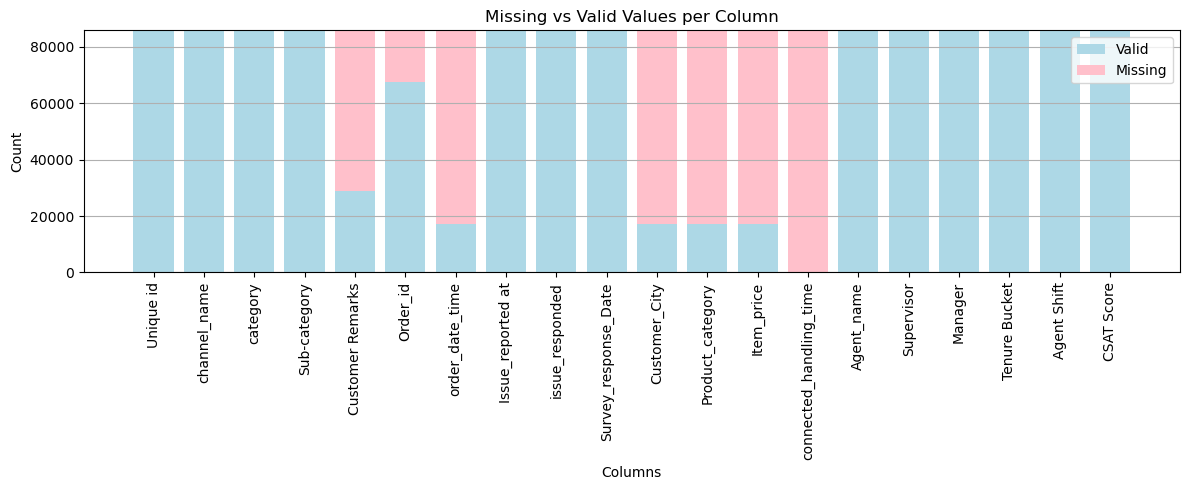

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))

plot_missing_valid(df, 'Missing vs Valid Values per Column', ax)

plt.tight_layout()
plt.show()

**Missing Values Observation**

Substantial missing values have been found in the following columns.

| **Column** | **Missing %** | **Possible Interpretation / Reason** | 
|------------------|-------------|--------------------------------------|
|`Customer Remarks`|66.54%|Many customers did not leave written feedback after the interaction.|
|`Order_id`|21.22%|Some service interactions may not have been linked to a specific order.|
|`order_date_time`, `Customer_City`, `Product_category`, `Item_price`|~80%|These attributes seem to be available only for order-related cases and missing for inquiry-related interactions.|
|`connected_handling_time`|99.72%|This field appears almost entirely unavailable and may not be useful for modeling.|

### Unique Values for each variable

In [26]:
df.nunique()

Unique id                  85907
channel_name                   3
category                      12
Sub-category                  57
Customer Remarks           18231
Order_id                   67675
order_date_time            13766
Issue_reported at          30923
issue_responded            30262
Survey_response_Date          31
Customer_City               1782
Product_category               9
Item_price                  2789
connected_handling_time      211
Agent_name                  1371
Supervisor                    40
Manager                        6
Tenure Bucket                  5
Agent Shift                    5
CSAT Score                     5
dtype: int64

---
## **2. Understanding Variables**

#### Variable Descriptions

- **Unique id:** Unique reference number for each record, ensuring traceability across the dataset.
- **channel_name:** The customer interaction channel (e.g., call, chat, email etc.) used to classify service touchpoints.
- **category:** High-level classification of customer concern (e.g., product, delivery, service etc.).
- **Sub-category:** Granular classification under category for deeper root-cause analysis.
- **Customer Remarks:** Free-text remarks from customers describing the issue/feedback in their own words.
- **Order_id:** Unique identifier of the order linked to the customer complaint/interaction.
- **order_date_time:** Timestamp of when the order was placed; essential for timeline and SLA analysis.
- **Issue_reported at:** Timestamp indicating when the issue was first raised by the customer.
- **issue_responded:** Timestamp indicating when the customer issue was responded to by the agent.
- **Survey_response_Date:** Timestamp when customer satisfaction feedback was recorded.
- **Customer_City:** Geographical location of the customer; useful for geo-segmented analysis.
- **Product_category:** Category of the ordered product; useful for product-wise complaint trends.
- **Item_price:** Price of the purchased item linked to the complaint.
- **connected_handling_time:** Time taken by the agent to resolve/handle the complaint.
- **Agent_name:** Name/identifier of the customer support agent.
- **Supervisor:** Supervisor assigned to the agent.
- **Manager:** Manager overseeing the support operations.
- **Tenure Bucket:** Tenure category of the agent; useful to check performance vs experience.
- **Agent Shift:** Shift/timing during which the agent was working during the interaction.
- **CSAT Score:** Customer satisfaction score provided post-resolution.

#### Initial Insights Summary

Dataset contains a *mix of categorical variables* (e.g., channel_name, category, Manager) and date-time variables (e.g., order_date_time, Issue_reported at).

**Missing values** are highly concentrated in Customer Remarks, Order_id, date-time variables, Customer_City, Product_category, Item_price, and handling_time.

**Handling approach:**
- Text variables: NA will be replaced with "Not Provided"
- Date variables: will be parsed to datetime; missing values retained as NaT or imputed using business rules if required.
- Numerical fields (Item_price, handling_time): imputation using median or model-based inference depending on distribution.

**Data type conversions** required for:
- order_date_time, Issue_reported at, issue_responded, Survey_response_Date: convert to datetime
- CSAT Score & Item_price: convert to numeric if detected as object.

---
## **3. EDA: Data Vizualization, Storytelling & Experimenting with charts - Understand the relationships between variables**

### 3.1: Distribution of CSAT Scores

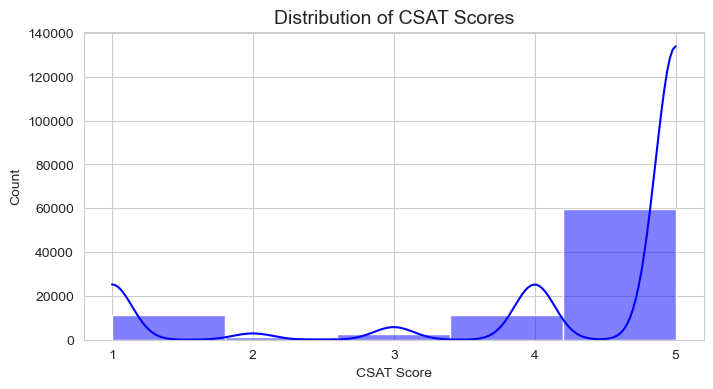

In [43]:
# Set style
sns.set_style("whitegrid")

plt.figure(figsize=(8, 4))
sns.histplot(df["CSAT Score"], bins=5, kde=True, color="blue")
plt.title("Distribution of CSAT Scores", fontsize=14)
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.xticks([1, 2, 3, 4, 5])
plt.show()

The CSAT distribution is ***highly right-skewed***, with score **5 dominating** the feedback (60K responses approx), indicating that most customers are **highly satisfied**. However, the next highest counts are scores 1 and 4 (11K each approx), suggesting a noticeable segment of extremely dissatisfied customers despite overall strong satisfaction.

### 3.2: Distribution of Issue Categories

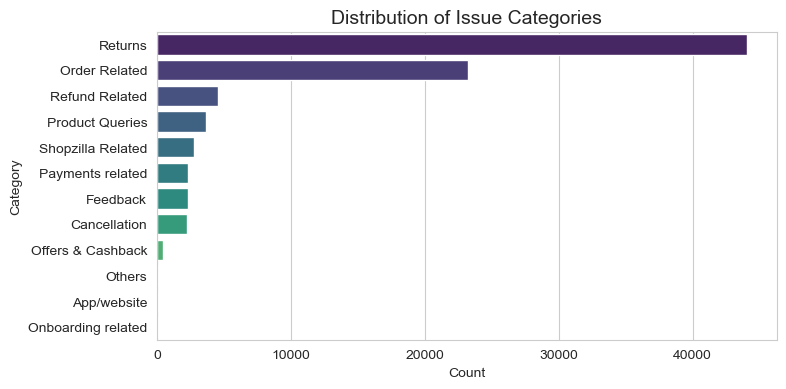

In [44]:
# Set style
sns.set_style("whitegrid")

plt.figure(figsize=(8, 4))
sns.countplot(y=df["category"], order=df["category"].value_counts().index, palette="viridis")
plt.title("Distribution of Issue Categories", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

- **Customer complaints** are predominantly **centered around Returns and Order-Related concerns**, revealing operational inefficiencies in fulfillment and return workflows. 
- **Refund and Product-Related issues also contribute significantly**, suggesting the need for better refund clarity and accurate product details.
- **App/Website and Onboarding complaints remain minimal**, indicating comparatively strong technical performance. 

***Strengthening returns, order management, and refund processes will be crucial for improving overall customer satisfaction.***

### 3.3: Issue Categories by Support Channel

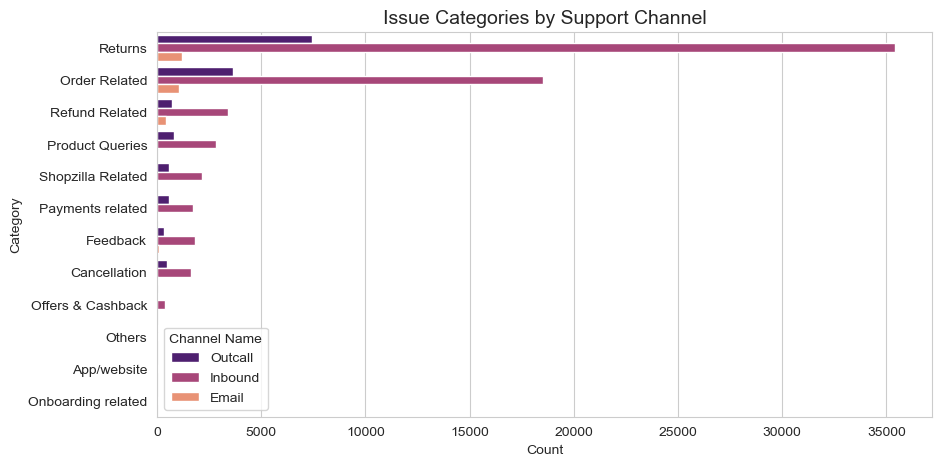

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df["category"], hue=df["channel_name"], order=df["category"].value_counts().index, palette="magma")
plt.title("Issue Categories by Support Channel", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Category")
plt.legend(title="Channel Name")
plt.show()

- **Returns and Order-related issues** account for the **highest customer interaction** volume, with **inbound channels dominating**, followed by outbound support. 
- **Refund and Product Queries** are also significant, but again **inbound is the primary channel** of engagement.
- **Email** usage remains **minimal across all categories.**
- **Outcall** support is **limited overall**, showing minimal proactive outreach. 
- **Offers & Cashback and App/Website** concerns show **negligible** interaction volumes, indicating they are not major customer pain points.

### 3.4: CSAT Scores by Agent Shift

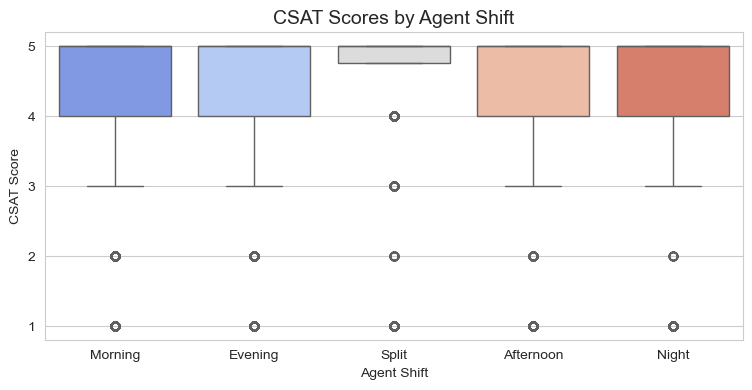

In [50]:
plt.figure(figsize=(9, 4))
sns.boxplot(x=df["Agent Shift"], y=df["CSAT Score"], palette="coolwarm")
plt.title("CSAT Scores by Agent Shift", fontsize=14)
plt.xlabel("Agent Shift")
plt.ylabel("CSAT Score")
plt.yticks([1,2,3,4,5])
plt.show()

- **CSAT scores are consistently high across all agent shifts**, with most ratings clustered around 4-5.  
- **A few low scores (1-2) are present in all shifts**, indicating occasional dissatisfaction.  
- **Variability is minimal**, meaning customer satisfaction is not significantly impacted by agent shift timing.

### 3.5: CSAT Scores by Agent Tenure

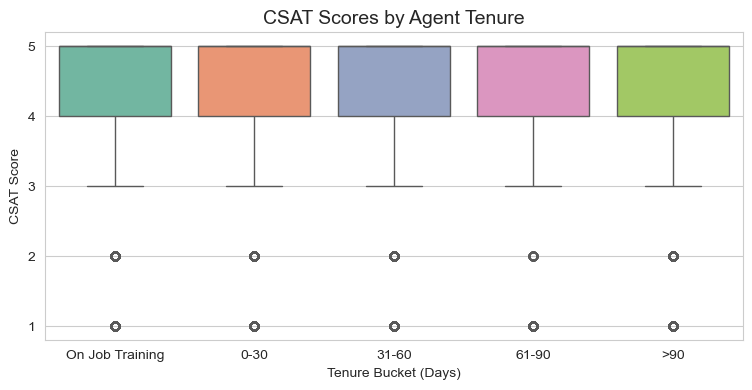

In [52]:
plt.figure(figsize=(9, 4))
sns.boxplot(x=df["Tenure Bucket"], y=df["CSAT Score"], order=["On Job Training", "0-30", "31-60", "61-90", ">90"], palette="Set2")
plt.title("CSAT Scores by Agent Tenure", fontsize=14)
plt.xlabel("Tenure Bucket (Days)")
plt.ylabel("CSAT Score")
plt.yticks([1,2,3,4,5])
plt.show()

- **CSAT scores remain high across all tenure buckets**, with most ratings around 4-5.  
- **On-the-job trainees perform similarly to experienced agents**, indicating effective training.  
- **Low scores (1-2) are present in all tenure groups**, suggesting occasional dissatisfaction is not tenure-dependent.  
- **Minimal variability across tenure buckets**, meaning agent **experience has little impact on CSAT scores**.

### 3.6: Response Time Distribution

In [92]:
# Create a new column 'Response_Time' as difference between 'Issue_reported at' and 'issue_responded' columns.
# Ensure both columns are datetime
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], format='%d/%m/%Y %H:%M')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], format='%d/%m/%Y %H:%M')

# Calculate the response time in minutes
df['Response_Time_minutes'] = ((df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60).round().astype(int)

# Create buckets for the response time to analyse the speed of response.
bins = [-float('inf'), 0, 30, 60, 90, 120, float('inf')]
labels = ['<0', '0–30', '30–60', '60–90', '90–120', '>120']

df['Response_Time_Category'] = pd.cut(
    df['Response_Time_minutes'],
    bins=bins,
    labels=labels,
    right=True
)

df['Response_Time_Category'].value_counts()

Response_Time_Category
0–30      57788
>120      14172
<0         5576
30–60      4484
60–90      2303
90–120     1584
Name: count, dtype: int64

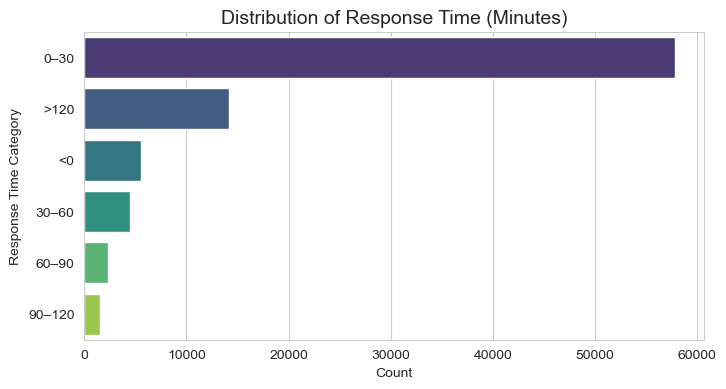

In [93]:
plt.figure(figsize=(8, 4))
sns.countplot(y=df["Response_Time_Category"], order=df["Response_Time_Category"].value_counts().index, palette="viridis")
plt.title("Distribution of Response Time (Minutes)", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Response Time Category")
plt.show()

- **Majority** of cases are handled **within 0–30 minutes**, reflecting **strong efficiency** in addressing customer issues promptly.
- A **sizable volume** of interactions **still take more than 120 minutes**, indicating **delays** for a considerable segment of customers.
- Categories **30–60 minutes and 60–90 minutes** are **comparatively low**, suggesting fewer borderline cases and a jump from fast responses to significantly delayed ones.
- **Negative or <0 minute cases** likely represent **timestamp errors or mislogged responses** and should be validated during preprocessing.

In [77]:
top_10_agents = df["Agent_name"].value_counts().head(10)
top_10_agents
# df_top_agents = df[df["Agent_name"].isin(top_10_agents)]
# df_top_agents

Agent_name
Wendy Taylor           429
Timothy Huff           265
David Smith            264
Jamie Smith            253
Kayla Wilson           216
Mrs. Jennifer Stone    200
Julie Williams         200
Sharon Bullock         195
Matthew White PhD      192
Anthony Booth          177
Name: count, dtype: int64

### 3.7: Top 10 Agents Handling the Most Issues

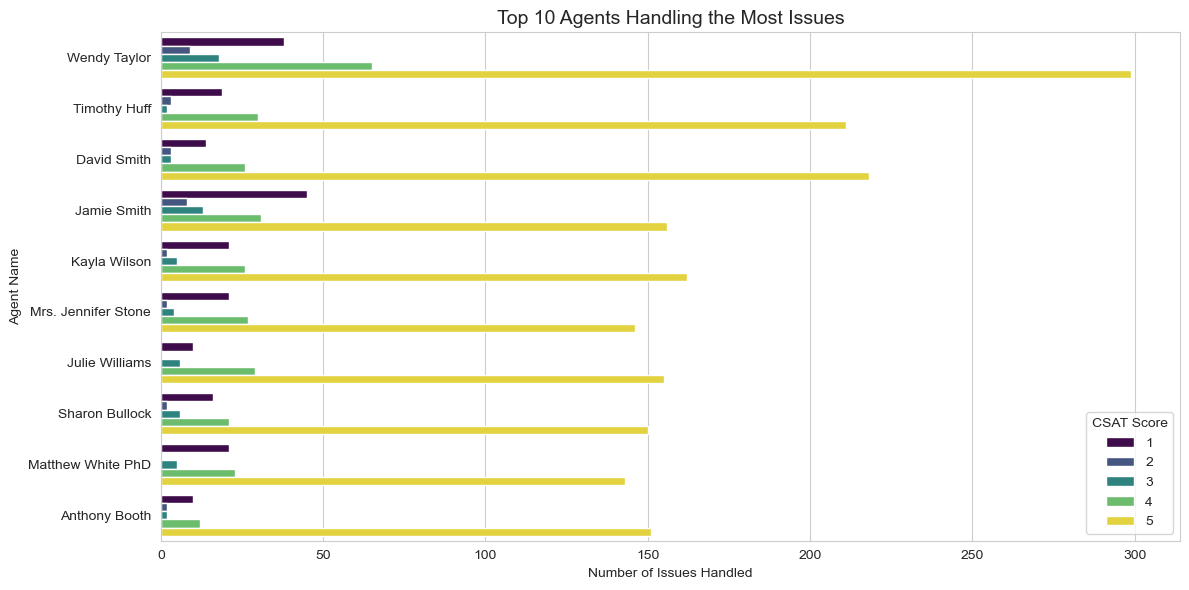

In [79]:
plt.figure(figsize=(12, 6))

# Top 10 agents
top_10_agents = df["Agent_name"].value_counts().head(10).index
df_top_agents = df[df["Agent_name"].isin(top_10_agents)]

# Plot the top 10 agents with legend of CSAT Score
sns.countplot(
    data=df_top_agents,
    y="Agent_name",
    hue="CSAT Score",
    order=df_top_agents["Agent_name"].value_counts().index,  # sort in descending order
    palette="viridis"
)

plt.title("Top 10 Agents Handling the Most Issues", fontsize=14)
plt.xlabel("Number of Issues Handled")
plt.ylabel("Agent Name")
plt.legend(title="CSAT Score")
plt.tight_layout()
plt.show()

- **Wendy Taylor, Timothy Huff, and David Smith** handle the **highest volume** of customer issues, with a strong concentration of **CSAT score 5**, reflecting consistently positive customer experiences.
- Most agents in the top 10 show a similar pattern of high workloads paired with high satisfaction.
- **Jamie Smith** stands out as an exception; despite handling fewer complaints, the number of **CSAT score 1 responses exceeds score 5**, indicating recurring service quality concerns suggesting that Jamie Smith ***may require targeted coaching or performance evaluation*** to improve customer outcomes.

### 3.7: Correlation Heatmap (before datatype conversion - few numerical features)

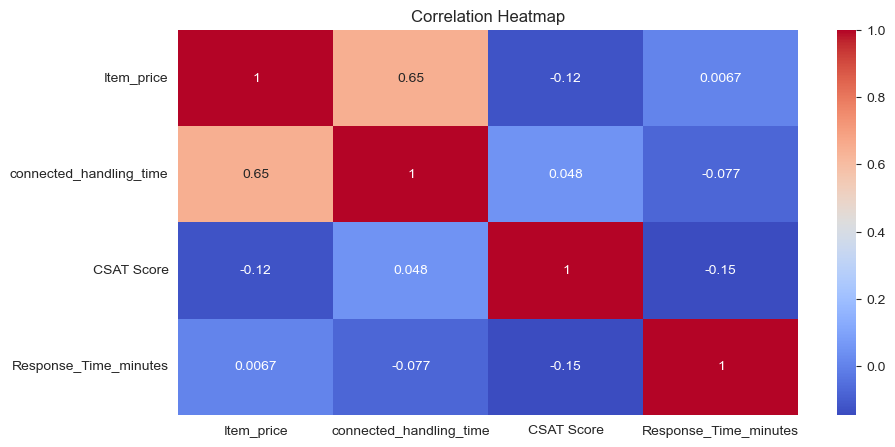

In [94]:
# Select only numeric columns for correlation calculation
numeric_data = df.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- **Item price and handling time have a moderate positive correlation (0.65)** indicating higher-priced items take longer to handle.  
- **CSAT Score has a weak negative correlation (-0.12) with item price and response time (-0.15)**, meaning expensive items and higher response time slightly reduce satisfaction.  
- **CSAT Score and handling time (0.048) have a near-zero correlation**, showing handling time doesn't strongly impact satisfaction.

---
##  **4. Feature Engineering & Data Pre-processing**

In [117]:
# Creating a copy of the dataset for further feature engineering
df_new=df.copy()

### 4.1: Handling Missing Values

**Missing Values Observation (as discussed earlier)**

Substantial missing values have been found in the following columns.

| **Column** | **Missing %** | **Possible Interpretation / Reason** | 
|------------------|-------------|--------------------------------------|
|`Customer Remarks`|66.54%|Many customers did not leave written feedback after the interaction.|
|`Order_id`|21.22%|Some service interactions may not have been linked to a specific order.|
|`order_date_time`, `Customer_City`, `Product_category`, `Item_price`|~80%|These attributes seem to be available only for order-related cases and missing for inquiry-related interactions.|
|`connected_handling_time`|99.72%|This field appears almost entirely unavailable and may not be useful for modeling.|

In [118]:
# Drop sparse / irrelevant columns
df_new = df_new.drop(columns=["Order_id", "connected_handling_time", "order_date_time"])

# Fill missing categorical columns with "Not Available"
categorical_cols = ["Customer_City", "Product_category", "Customer Remarks"]
df_new[categorical_cols] = df_new[categorical_cols].fillna("Not Available")

# Fill missing Item_price with -1
df_new["Item_price"] = df_new["Item_price"].fillna(-1)

# Display the first few rows of the DataFrame to verify changes
df_new.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Response_Time_minutes,Response_Time_Category
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,Not Available,2023-08-01 11:13:00,2023-08-01 11:47:00,01-Aug-23,Not Available,Not Available,-1.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,34,30–60
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,Not Available,2023-08-01 12:52:00,2023-08-01 12:54:00,01-Aug-23,Not Available,Not Available,-1.0,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,2,0–30
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,Not Available,2023-08-01 20:16:00,2023-08-01 20:38:00,01-Aug-23,Not Available,Not Available,-1.0,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,22,0–30
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,Not Available,2023-08-01 20:56:00,2023-08-01 21:16:00,01-Aug-23,Not Available,Not Available,-1.0,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,20,0–30
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,Not Available,2023-08-01 10:30:00,2023-08-01 10:32:00,01-Aug-23,Not Available,Not Available,-1.0,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,2,0–30


**Missing Value Treatment Summary**

| **Column** | **Action Taken** | **Rationale** | 
|------------------|------------------|------------------|
|`Order_id`|Dropped|Unique identifier with no predictive value.|
|`connected_handling_time`|Dropped|99% missing - too sparse to contribute meaningfully to the model.|
|`order_date_time`|Dropped|Approx 80% missing and not essential to distinguish order vs inquiry; therefore removed to avoid noise.|
|`Customer Remarks`, `Customer_City`, `Product_category`|Filled with `Not Available`|Categorical fields where the absence of information may itself indicate behavior (e.g., non-order inquiries). Retaining these preserves potential signal.|
|`Item_price`|Filled with `-1`|Although approx 80% missing, price may be an important driver of customer satisfaction for the records where it exists. -1 is used to explicitly differentiate non-order interactions rather than remove the feature.|

In [119]:
df_new.isnull().sum()

Unique id                 0
channel_name              0
category                  0
Sub-category              0
Customer Remarks          0
Issue_reported at         0
issue_responded           0
Survey_response_Date      0
Customer_City             0
Product_category          0
Item_price                0
Agent_name                0
Supervisor                0
Manager                   0
Tenure Bucket             0
Agent Shift               0
CSAT Score                0
Response_Time_minutes     0
Response_Time_Category    0
dtype: int64

***All missing values have been treated successfully.***

### 4.2: Few more Transformations

In [120]:
# Drop the unique identifier column
df_new.drop(columns=['Unique id'], inplace=True)

# Convert Survey_response_Date to datetime (date only)
df_new['Survey_response_Date'] = pd.to_datetime(df_new['Survey_response_Date'], format='%d-%b-%y')

# Drop Response_Time_minutes since the categorical version will be used
df_new.drop(columns=['Response_Time_minutes'], inplace=True)

# Convert CSAT Score to categorical/string data type
df_new['CSAT Score'] = df_new['CSAT Score'].astype('category')

**Other Data Transformations Summary**

| **Column** | **Action Taken** | **Rationale** | 
|------------------|------------------|------------------|
|`Unique id`|Dropped|Unique identifier with no predictive value.|
|`Survey_response_Date`|Converted to datetime|Time component was not present; converting ensures consistency and supports time-based analysis if needed.|
|`Response_Time_minutes`|Dropped|Information is already captured more meaningfully in `Response_Time_Category`, avoiding redundancy and multicollinearity.|
|`CSAT Score`|Converted to categorical (category dtype)|CSAT represents rating levels, not continuous numeric values; prepares data correctly for classification modeling.|

In [121]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   channel_name            85907 non-null  object        
 1   category                85907 non-null  object        
 2   Sub-category            85907 non-null  object        
 3   Customer Remarks        85907 non-null  object        
 4   Issue_reported at       85907 non-null  datetime64[ns]
 5   issue_responded         85907 non-null  datetime64[ns]
 6   Survey_response_Date    85907 non-null  datetime64[ns]
 7   Customer_City           85907 non-null  object        
 8   Product_category        85907 non-null  object        
 9   Item_price              85907 non-null  float64       
 10  Agent_name              85907 non-null  object        
 11  Supervisor              85907 non-null  object        
 12  Manager                 85907 non-null  object

### 4.3: Handling Outliers

The cleaned dataset has mostly categorical variables, so outlier detection will focus only on numeric variables. Currently, the only true numeric variable is `Item_price`. We'll check and treat outliers in this column using **IQR (Interquartile Range)** method.

In [122]:
# Step 1: Use IQR (Interquartile Range) to detect price outliers

Q1 = df_new['Item_price'].quantile(0.25)
Q3 = df_new['Item_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_new[(df_new['Item_price'] < lower_bound) | (df_new['Item_price'] > upper_bound)]
print("Outlier count:", len(outliers))

Outlier count: 17206


In [123]:
# Step 2: Treat outliers by capping them to upper and lower bounds.
df_new['Item_price'] = df_new['Item_price'].clip(lower=lower_bound, upper=upper_bound)

***Outliers have been handled successfully.***

### 4.4: Categorical Encoding

In [112]:
df_new.columns

Index(['channel_name', 'category', 'Sub-category', 'Customer Remarks',
       'Issue_reported at', 'issue_responded', 'Survey_response_Date',
       'Customer_City', 'Product_category', 'Item_price', 'Agent_name',
       'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score',
       'Response_Time_Category'],
      dtype='object')

In [115]:
df_new.head()

,channel_name,category,Sub-category,Customer Remarks,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score,Response_Time_Category
0,Outcall,Product Queries,Life Insurance,Not Available,2023-08-01 11:13:00,2023-08-01 11:47:00,2023-08-01,Not Available,Not Available,-1.0,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5,30–60
1,Outcall,Product Queries,Product Specific Information,Not Available,2023-08-01 12:52:00,2023-08-01 12:54:00,2023-08-01,Not Available,Not Available,-1.0,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5,0–30
2,Inbound,Order Related,Installation/demo,Not Available,2023-08-01 20:16:00,2023-08-01 20:38:00,2023-08-01,Not Available,Not Available,-1.0,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5,0–30
3,Inbound,Returns,Reverse Pickup Enquiry,Not Available,2023-08-01 20:56:00,2023-08-01 21:16:00,2023-08-01,Not Available,Not Available,-1.0,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5,0–30
4,Inbound,Cancellation,Not Needed,Not Available,2023-08-01 10:30:00,2023-08-01 10:32:00,2023-08-01,Not Available,Not Available,-1.0,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5,0–30
